### Comparing Regressors

In [ ]:
%pip install -U lazypredict

In [2]:
! python -m pip install seaborn
! python -m pip install sklearn

  Using cached seaborn-0.12.0-py3-none-any.whl (285 kB)
  Using cached matplotlib-3.6.0-cp39-cp39-macosx_10_12_x86_64.whl (7.3 MB)
  Using cached numpy-1.23.3-cp39-cp39-macosx_10_9_x86_64.whl (18.1 MB)
  Using cached pandas-1.5.0-cp39-cp39-macosx_10_9_x86_64.whl (12.1 MB)
  Using cached Pillow-9.2.0-cp39-cp39-macosx_10_10_x86_64.whl (3.1 MB)
  Using cached fonttools-4.37.3-py3-none-any.whl (959 kB)
  Using cached kiwisolver-1.4.4-cp39-cp39-macosx_10_9_x86_64.whl (65 kB)
  Using cached contourpy-1.0.5-cp39-cp39-macosx_10_9_x86_64.whl (241 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pytz-2022.2.1-py2.py3-none-any.whl (500 kB)
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-1.1.2-cp39-cp39-macosx_10_9_x86_64.whl (8.7 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached scipy-1.9.1-cp39-cp39-macosx_12_0_universal2.macosx_10_9_x86_64.whl (58.4 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/Users/rfinnegan/opt/miniconda3/envs/my-rdkit-env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# Load dataset
df = pd.read_csv('bioactivity_data_3class_pIC50_pubchem_fp.csv')

X = df.drop('pIC50', axis=1)
Y = df.pIC50

### Data preprocessing

In [4]:
# Examine X dimension
X.shape

(133, 881)

In [5]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(133, 200)

In [18]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Compare 42 ML algorithms

In [27]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)


100%|██████████| 42/42 [00:09<00:00,  4.21it/s]


In [28]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:09<00:00,  4.21it/s]


In [29]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,74061564228988260188301740781080940789967066318...,-6700808192146555769900265822274260081912272797...,45466324728653842005624926372719793448943616.00,0.11
KernelRidge,7.36,-4.76,4.21,0.02
DummyRegressor,2.11,0.00,1.76,0.02
LassoLars,2.11,0.00,1.76,0.02
Lasso,2.08,0.03,1.73,0.01
ElasticNet,1.82,0.26,1.51,0.02
OrthogonalMatchingPursuitCV,1.72,0.35,1.42,0.02
LassoLarsIC,1.70,0.36,1.40,0.02
LarsCV,1.67,0.40,1.37,0.30


In [30]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,55048621798402541431198608540714844851752243169...,-3684023151123862435096429410059056992427550621...,35303752056908593987864319045243812756106727107...,0.11
LinearRegression,171546399044332525977600.00,-1148041285912071512260608.00,1970781342845.96,0.02
TransformedTargetRegressor,171546399044332525977600.00,-1148041285912071512260608.00,1970781342845.96,0.02
KernelRidge,1.96,-5.43,4.66,0.02
GaussianProcessRegressor,1.51,-2.44,3.41,0.02
HuberRegressor,1.20,-0.31,2.11,0.06
LinearSVR,1.19,-0.26,2.07,0.07
XGBRegressor,1.18,-0.22,2.04,0.06
MLPRegressor,1.16,-0.10,1.93,0.24


### Data visualization of model performance

[(0.0, 1.0)]

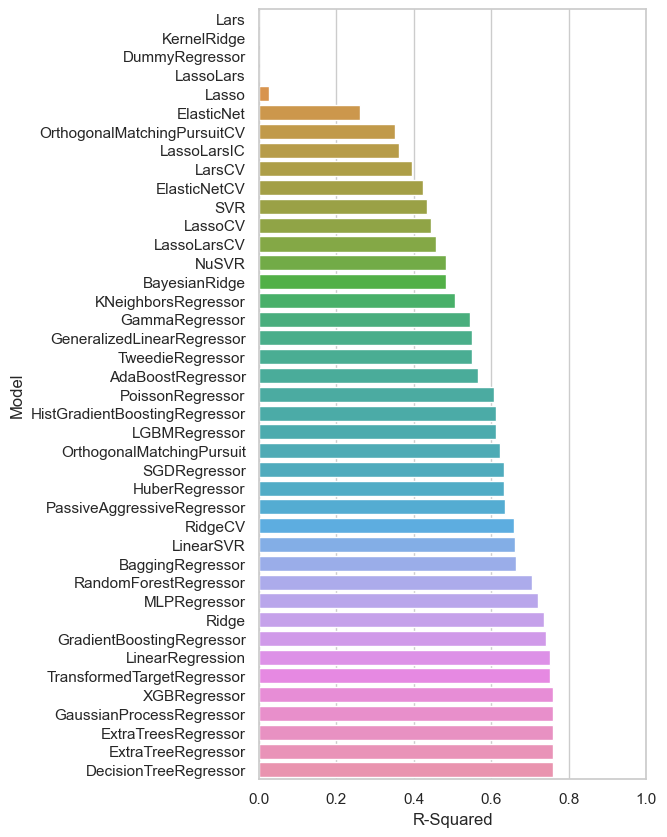

In [31]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

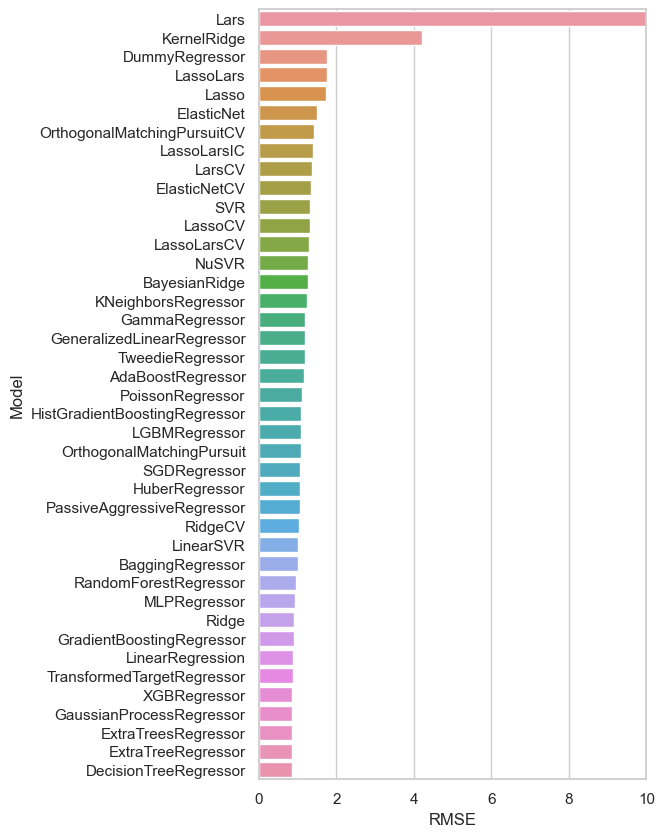

In [32]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

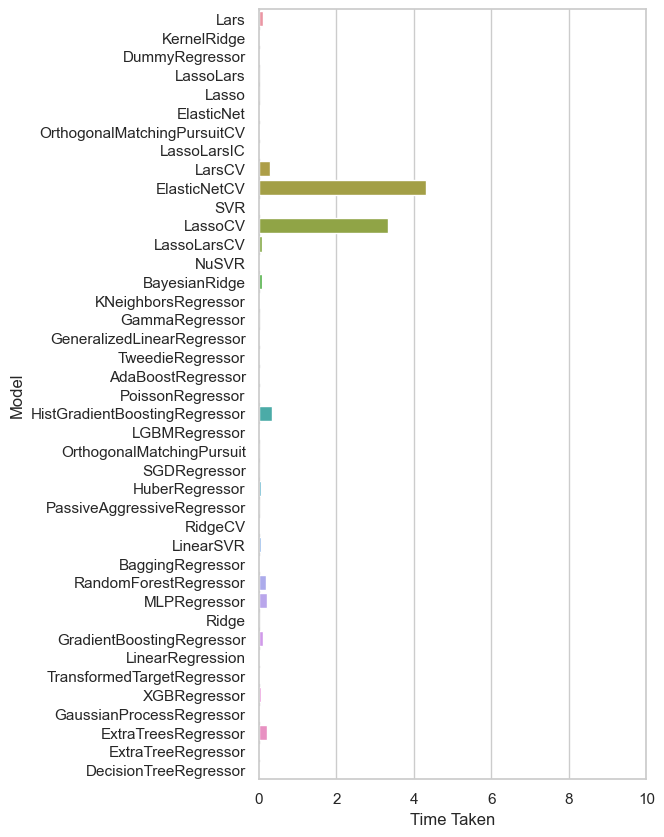

In [33]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))